<a href="https://colab.research.google.com/github/MarcioB1999/Modelo_Regress-o_Linear_Simples/blob/main/MRLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
 
import matplotlib.pyplot as plt
 
import statsmodels.api as sm
 
from statsmodels.formula.api import ols
 
from mpl_toolkits.mplot3d import Axes3D
 
import pandas as pd
 
from statsmodels.stats.anova import anova_lm
 
spector_data = sm.datasets.spector.load(as_pandas=False)
 
 
#spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
X=[[0, 3], [1, 1], [2, 2], [3, 0]]
X=sm.add_constant(X)
Y=[-4, 5, 4, 11]
# Fit and summarize OLS model
 
mod = sm.OLS(Y, X)
 
res = mod.fit()
 
print(res.summary())
 
print('Parameters: ', res.params)
 
print('R2: ', res.rsquared)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     56.50
Date:                Fri, 23 Jul 2021   Prob (F-statistic):             0.0937
Time:                        14:30:43   Log-Likelihood:                -2.9032
No. Observations:                   4   AIC:                             11.81
Df Residuals:                       1   BIC:                             9.965
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5000      2.179      2.524      0.2

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


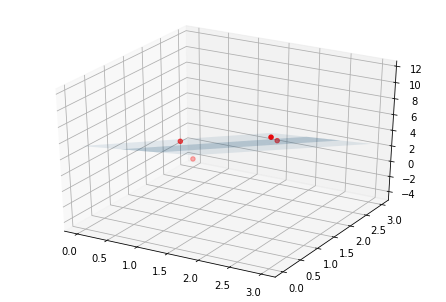

<Figure size 432x288 with 0 Axes>

In [7]:
 
fig=plt.figure()
ax=Axes3D(fig)
#ax=fig.add_subplot(projection='3d')
fig2=plt.figure()
aux1=X[:,1]
aux2=X[:,2]
aux1,aux2=np.meshgrid(aux1,aux2)
Z=res.params[0]+res.params[1]*aux1+res.params[2]*aux2
#ax=Axes3D(fig2)
ax.plot_surface(aux1, aux2, Z,alpha=0.1)
ax.scatter(X[:,1], X[:,2], Y, color='red')
plt.show()

In [4]:
 print(res.f_test("x1=x2"))

<F test: F=array([[112.5]]), p=0.05984418998444165, df_denom=1, df_num=1>


In [5]:
 
#valor predito
print(res.predict([1, 2.5, 2.5]))
R=[[0, 0, 1]]
#print(res.f_test(R))
#intervalo de confiança para os parâmetros
#print(res.conf_int(0.05))

[3.]


In [ ]:
data = pd.DataFrame({'x1': X[:,1], 'x2': X[:,2], 'y': Y})
model = ols("y ~ x1 + x2", data).fit()
anova_results =anova_lm(model)
#df=graus de liberdade
#sum_sq=soma de quadrados
#
print('\nANOVA results')
print(anova_results)


ANOVA results
            df      sum_sq     mean_sq          F    PR(>F)
x1         1.0  352.269797  352.269797  52.586609  0.000001
x2         1.0   29.239255   29.239255   4.364817  0.052034
Residual  17.0  113.880448    6.698850        NaN       NaN
